In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import (
    KNeighborsRegressor,
    KNeighborsClassifier)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)
from sklearn.ensemble import (
    BaggingClassifier,
    BaggingRegressor,
    RandomForestRegressor,
    RandomForestClassifier
)
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    plot_confusion_matrix,
    precision_score,
    recall_score
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    train_test_split
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)

In [2]:
btc = pd.read_csv("btc_transform.csv")  # Read in file

In [3]:
btc

Date     Adj Close       Volume      Close_-1     Delta  \
0     2022-01-06  43160.929688  30208048289  43569.003906 -0.009366   
1     2022-01-05  43569.003906  36851084859  45897.574219 -0.050734   
2     2022-01-04  45897.574219  42494677905  46458.117188 -0.012066   
3     2022-01-03  46458.117188  33071628362  47345.218750 -0.018737   
4     2022-01-02  47345.218750  27951569547  47686.812500 -0.007163   
...          ...           ...          ...           ...       ...   
1452  2018-01-15  13819.799805  12750799872  13772.000000  0.003471   
1453  2018-01-14  13772.000000  11084099584  14360.200195 -0.040960   
1454  2018-01-13  14360.200195  12763599872  13980.599609  0.027152   
1455  2018-01-12  13980.599609  12065699840  13405.799805  0.042877   
1456  2018-01-11  13405.799805  16534099968  14973.299805 -0.104686   

      Delta_Class_Numeric  Close_-1_Delta  AVG_Weighted_Future_Return  \
0                     0.0       -0.050734                   -0.034876   
1                     0.0       -0.012066                   -0.022267   
2                     0.0       -0.018737                   -0.067490   
3                     0.0       -0.007163                   -0.038699   
4                     0.0        0.029809                   -0.047394   
...                   ...             ...                         ...   
1452                  1.0       -0.040960                   -0.158693   
1453                  0.0        0.027152                   -0.069910   
1454                  1.0        0.042877                   -0.104620   
1455                  1.0       -0.104686                   -0.007130   
1456                  0.0        0.025892                    0.019634   

      Gain_Run  Gain_Loss  ...  50-Day_AVG_Price  100-Day_AVG_Price  \
0          0.0        1.0  ...      51196.647422       54984.217617   
1          0.0        1.0  ...      51528.492266       54970.884883   
2          0.0        0.0  ...      51881.698203       54943.994531   
3          0.0        0.0  ...      52261.872656       54906.579297   
4          0.0        0.0  ...      52604.358828       54861.524610   
...        ...        ...  ...               ...                ...   
1452       0.0        0.0  ...      14691.666172       10597.504883   
1453       0.0        0.0  ...      14592.044570       10503.492983   
1454       0.0        0.0  ...      14469.914375       10403.175083   
1455       0.0        0.0  ...      14351.077783       10305.662686   
1456       0.0        0.0  ...      14248.032783       10214.779487   

      7-Day_AG_to_30-Day_AVG  30-Day_AG_to_50-Day_AVG  \
0                  -0.035512                -0.061359   
1                  -0.031674                -0.062867   
2                  -0.028997                -0.067017   
3                  -0.018507                -0.072054   
4                  -0.012546                -0.074133   
...                      ...                      ...   
1452               -0.073739                 0.052480   
1453               -0.056744                 0.068654   
1454               -0.032291                 0.082751   
1455               -0.005977                 0.097355   
1456                0.005387                 0.114672   

      50-Day_AG_to_100-Day_AVG  7_to_30_5-Day_AVG  30_to_50_5-Day_AVG  \
0                    -0.068885          -0.025447           -0.067486   
1                    -0.062622          -0.020436           -0.070086   
2                    -0.055735          -0.015038           -0.072313   
3                    -0.048167          -0.009414           -0.073719   
4                    -0.041143          -0.006154           -0.074123   
...                        ...                ...                 ...   
1452                  0.386333          -0.032673            0.083182   
1453                  0.389256          -0.017265            0.098730   
1454                  0.390913          -0.004924            0.113520   
1455          

# Build and Test Predictive Models

### Select subset of data and do train_test_split

In [4]:
btc_2022 = btc[btc['Year'] >= 2021]  # Separate 2022 data

btc = btc[btc['Year'] < 2021]  # Remove 2022 data from the model

### Predict against 'AVG_Weighted_Future_Return' 

In [5]:
# Get Y and X variables

Y = btc['AVG_Weighted_Future_Return']

X = btc.iloc[:, np.r_[3:4,6,8:32]]

# Split out Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Collect 2022 data that the model will be applied to

Z = btc_2022.iloc[:, np.r_[3:4,6,8:32]]

### Linear Regression

In [6]:
# Linear Regression

simple_linear_regression = LinearRegression().fit(X_train, Y_train)

In [7]:
mean_squared_error(Y_train, simple_linear_regression.predict(X_train))

0.00194191081697427

In [8]:
mean_squared_error(Y_test, simple_linear_regression.predict(X_test))

0.0017877621733673776

In [9]:
# Apply the model on the new set of data

# LR = pd.DataFrame(simple_linear_regression.predict(Z))
# LR = LR.rename(columns={0:'PREDICTION'})

# Add the prediction to the remaining data

# frames = [LR, btc_2022]

# LR_Final = pd.concat(frames, axis=1)

# LR_Final.to_csv('LR_Final.csv', 
#                 index=False)

### Decision Tree 

In [10]:
# Decision Tree

grid_search_cv_dt = GridSearchCV(DecisionTreeRegressor(random_state=42),
                              param_grid=dict(min_impurity_decrease=np.arange(-2.00, 2.00, 0.01)),
                              cv=KFold(n_splits=2, shuffle=True, random_state=42)).fit(X_train, Y_train)

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

In [11]:
grid_search_cv_dt.best_params_

{'min_impurity_decrease': 0.010000000000001563}

In [12]:
mean_squared_error(Y_train, grid_search_cv_dt.best_estimator_.predict(X_train))

0.0020674526413497385

In [13]:
mean_squared_error(Y_test, grid_search_cv_dt.best_estimator_.predict(X_test))

0.0017955363454085426

In [14]:
# Apply the model on the new set of data

# DT = pd.DataFrame(grid_search_cv_dt.best_estimator_.predict(Z))
# DT = DT.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [DT, btc_2022]

# DT_Final = pd.concat(frames, axis=1)

# DT_Final.to_csv('DT_Final.csv', 
#                 index=False)

### Bagged Tree 

In [15]:
# Bagging

bag_fit = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42, max_depth=5),random_state=42).fit(X_train, Y_train)

In [16]:
mean_squared_error(Y_train, bag_fit.predict(X_train))

0.0013620687816499747

In [17]:
mean_squared_error(Y_test, bag_fit.predict(X_test))

0.0016080287818376283

In [18]:
# Apply the model on the new set of data

# BT = pd.DataFrame(bag_fit.predict(Z))
# BT = BT.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [BT, btc_2022]

# BT_Final = pd.concat(frames, axis=1)

# BT_Final.to_csv('BT_Final.csv', 
#                 index=False)

### Random Forrest 

In [19]:
# Random Forest

rf_fit = RandomForestRegressor(random_state = 42).fit(X_train, Y_train)

In [20]:
mean_squared_error(Y_train, rf_fit.predict(X_train))

0.00021933554206012834

In [21]:
mean_squared_error(Y_test, rf_fit.predict(X_test))

0.0014195079877990957

In [22]:
# Apply the model on the new set of data

# RF = pd.DataFrame(rf_fit.predict(Z))
# RF = RF.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [RF, btc_2022]

# RF_Final = pd.concat(frames, axis=1)

# RF_Final.to_csv('RF_Final.csv', 
#                 index=False)

### KNN

In [23]:
# KNN

knn_pipeline = make_pipeline(KNeighborsRegressor())

knn_fit = knn_pipeline.fit(X_train, Y_train)

In [24]:
mean_squared_error(Y_train, knn_fit.predict(X_train))

0.0009744409596303101

In [25]:
mean_squared_error(Y_test, knn_fit.predict(X_test))

0.0015250790073218323

In [26]:
# Apply the model on the new set of data

# KNN = pd.DataFrame(knn_fit.predict(Z))
# KNN = KNN.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [KNN, btc_2022]

# KNN_Final = pd.concat(frames, axis=1)

# KNN_Final.to_csv('KNN_Final.csv', 
#                 index=False)

### Predict against 'Delta_Class_Numeric' 

In [27]:
# Get new Y variable

Y = btc['Delta_Class_Numeric']

# Split out Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### Logistic Regression

In [28]:
log_regression = LogisticRegression().fit(X_train, Y_train)

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
mean_squared_error(Y_train, log_regression.predict(X_train))

0.45789473684210524

In [30]:
mean_squared_error(Y_test, log_regression.predict(X_test))

0.5337423312883436

In [31]:
# Apply the model on the new set of data

# LogR = pd.DataFrame(log_regression.predict(Z))
# LogR = LogR.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [LogR, btc_2022]

# LogR_Final = pd.concat(frames, axis=1)

# LogR_Final.to_csv('LogR_Final.csv', 
#                 index=False)

### Decision Tree 

In [32]:
tree = DecisionTreeClassifier(random_state=42).fit(X_train, Y_train)

In [33]:
mean_squared_error(Y_train, tree.predict(X_train))

0.0

In [34]:
mean_squared_error(Y_test, tree.predict(X_test))

0.49693251533742333

In [35]:
plot_confusion_matrix(tree, X_train, Y_train)

In [36]:
plot_confusion_matrix(tree, X_test, Y_test)

In [37]:
accuracy_score(Y_train, tree.predict(X_train))

1.0

In [38]:
precision_score(Y_train, tree.predict(X_train), average='macro')

1.0

In [39]:
recall_score(Y_train, tree.predict(X_train), average='macro')

1.0

In [40]:
accuracy_score(Y_test, tree.predict(X_test))

0.5030674846625767

In [41]:
precision_score(Y_test, tree.predict(X_test), average='macro')

0.5028455131345871

In [42]:
recall_score(Y_test, tree.predict(X_test), average='macro')

0.5028420854507811

In [43]:
# # Apply the model on the new set of data

# DTc = pd.DataFrame(tree.predict(Z))
# DTc = DTc.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [DTc, btc_2022]

# DTc_Final = pd.concat(frames, axis=1)

# DTc_Final.to_csv('DTcbintest_Final.csv', 
#                 index=False)

### Decision Tree with Cross Validation and Optimized

In [44]:
# Decision Tree

grid_search_cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid=dict(min_impurity_decrease=np.arange(-2.00, 2.00, 0.01))).fit(X_train, Y_train)

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

In [45]:
grid_search_cv_dt.best_params_

{'min_impurity_decrease': 0.010000000000001563}

In [46]:
mean_squared_error(Y_train, grid_search_cv_dt.best_estimator_.predict(X_train))

0.45789473684210524

In [47]:
mean_squared_error(Y_test, grid_search_cv_dt.best_estimator_.predict(X_test))

0.4938650306748466

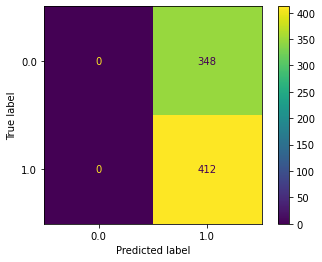

In [48]:
plot_confusion_matrix(grid_search_cv_dt, X_train, Y_train)

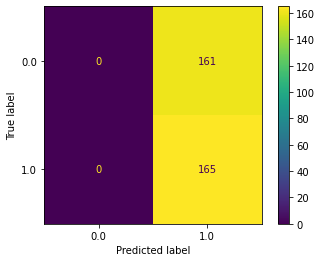

In [49]:
plot_confusion_matrix(grid_search_cv_dt, X_test, Y_test)

In [50]:
accuracy_score(Y_train, grid_search_cv_dt.predict(X_train))

0.5421052631578948

In [51]:
precision_score(Y_train, grid_search_cv_dt.predict(X_train), average='macro')

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.2710526315789474

In [52]:
recall_score(Y_train, grid_search_cv_dt.predict(X_train), average='macro')

0.5

In [53]:
accuracy_score(Y_test, grid_search_cv_dt.predict(X_test))

0.5061349693251533

In [54]:
precision_score(Y_test, grid_search_cv_dt.predict(X_test), average='macro')

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.25306748466257667

In [55]:
recall_score(Y_test, grid_search_cv_dt.predict(X_test), average='macro')

0.5

In [56]:
# Apply the model on the new set of data

# DT2c = pd.DataFrame(grid_search_cv_dt.predict(Z))
# DT2c = DT2c.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [DT2c, btc_2022]

# DT2c_Final = pd.concat(frames, axis=1)

# DT2c_Final.to_csv('DT2c_Final.csv', 
#                 index=False)

### Random Forrest 

In [57]:
# Random Forest

rf_fit = RandomForestClassifier(random_state = 42).fit(X_train, Y_train)

In [58]:
mean_squared_error(Y_train, rf_fit.predict(X_train))

0.0

In [59]:
mean_squared_error(Y_test, rf_fit.predict(X_test))

0.5122699386503068

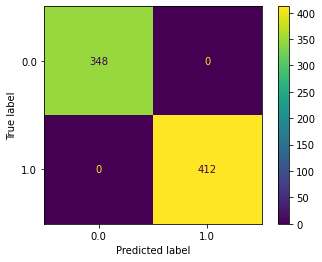

In [60]:
plot_confusion_matrix(rf_fit, X_train, Y_train) 

In [61]:
plot_confusion_matrix(rf_fit, X_test, Y_test)

In [62]:
accuracy_score(Y_train, rf_fit.predict(X_train))

1.0

In [63]:
precision_score(Y_train, rf_fit.predict(X_train), average='macro')

1.0

In [64]:
recall_score(Y_train, rf_fit.predict(X_train), average='macro')

1.0

In [65]:
accuracy_score(Y_test, rf_fit.predict(X_test))

0.48773006134969327

In [66]:
precision_score(Y_test, rf_fit.predict(X_test), average='macro')

0.4860590440487348

In [67]:
recall_score(Y_test, rf_fit.predict(X_test), average='macro')

0.48656126482213435

In [68]:
# Apply the model on the new set of data

# RFc = pd.DataFrame(rf_fit.predict(Z))
# RFc = RFc.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [RFc, btc_2022]

# RFc_Final = pd.concat(frames, axis=1)

# RFc_Final.to_csv('RFcbin_Final.csv', 
#                 index=False)

### KNN

In [69]:
# KNN

knn_pipeline = make_pipeline(KNeighborsClassifier())

knn_fit = knn_pipeline.fit(X_train, Y_train)

In [70]:
mean_squared_error(Y_train, knn_fit.predict(X_train))

0.30394736842105263

In [71]:
mean_squared_error(Y_test, knn_fit.predict(X_test))

0.5276073619631901

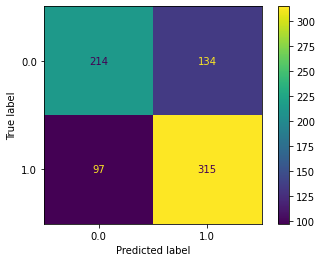

In [72]:
plot_confusion_matrix(knn_fit, X_train, Y_train) 

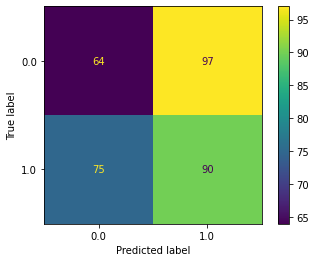

In [73]:
plot_confusion_matrix(knn_fit, X_test, Y_test)

In [74]:
accuracy_score(Y_train, knn_fit.predict(X_train))

0.6960526315789474

In [75]:
precision_score(Y_train, knn_fit.predict(X_train), average='macro')

0.6948309569676093

In [76]:
recall_score(Y_train, knn_fit.predict(X_train), average='macro')

0.6897528177658743

In [77]:
accuracy_score(Y_test, knn_fit.predict(X_test))

0.4723926380368098

In [78]:
precision_score(Y_test, knn_fit.predict(X_test), average='macro')

0.470857538568076

In [79]:
recall_score(Y_test, knn_fit.predict(X_test), average='macro')

0.471485036702428

In [80]:
# Apply the model on the new set of data

# KNNc = pd.DataFrame(knn_fit.predict(Z))
# KNNc = KNNc.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [KNNc, btc_2022]

# KNNc_Final = pd.concat(frames, axis=1)

# KNNc_Final.to_csv('KNNcbin_Final.csv', 
#                 index=False)

### KNN With Cross Validation and Best n_neighbors 

In [81]:
k_fold = KFold(n_splits=2, shuffle=True, random_state=42)

In [82]:
knn_pipeline = make_pipeline(StandardScaler(),
                             KNeighborsClassifier())

In [83]:
k_candidates = np.arange(1, 100)

In [84]:
grid_search_cv = GridSearchCV(knn_pipeline,
                              dict(kneighborsclassifier__n_neighbors=k_candidates),
                              cv=k_fold).fit(X_train, Y_train)

In [85]:
grid_search_cv.best_params_

{'kneighborsclassifier__n_neighbors': 17}

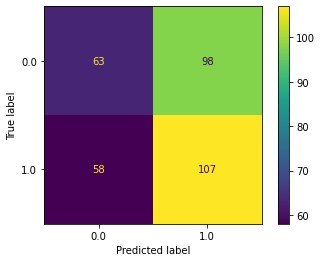

In [86]:
plot_confusion_matrix(grid_search_cv.best_estimator_, X_test, Y_test)

In [87]:
mean_squared_error(Y_train, grid_search_cv.best_estimator_.predict(X_train))

0.38026315789473686

In [88]:
mean_squared_error(Y_test, grid_search_cv.best_estimator_.predict(X_test))

0.4785276073619632

In [89]:
accuracy_score(Y_train,grid_search_cv.best_estimator_.predict(X_train))

0.6197368421052631

In [90]:
precision_score(Y_train, grid_search_cv.best_estimator_.predict(X_train), average='macro')

0.6167966974418588

In [91]:
recall_score(Y_train, grid_search_cv.best_estimator_.predict(X_train), average='macro')

0.609320946322955

In [92]:
accuracy_score(Y_test, grid_search_cv.best_estimator_.predict(X_test))

0.5214723926380368

In [93]:
precision_score(Y_test, grid_search_cv.best_estimator_.predict(X_test), average='macro')

0.5213061882684943

In [94]:
recall_score(Y_test, grid_search_cv.best_estimator_.predict(X_test), average='macro')

0.5198945981554677

In [95]:
# # Apply the model on the new set of data

# KNN2c = pd.DataFrame(grid_search_cv.best_estimator_.predict(Z))
# KNN2c = KNN2c.rename(columns={0:'PREDICTION'})

# # Add the prediction to the remaining data

# frames = [KNN2c, btc_2022]

# KNN2c_Final = pd.concat(frames, axis=1)

# KNN2c_Final.to_csv('KNN2cbin2_Final.csv', 
#                 index=False)